In [6]:
import os
import struct
import numpy as np
 
path = "./dataset/mnist_train.csv"    

# Dataset addestramento: 60k immagini, 60k etichette
# Dataset test: 10k immagini, 10k etichette


def load_mnist(path, kind='train'):
    """Load MNIST data from 'path'"""
    
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
    
    # apro il file dal percorso labels_path in modalità lettura  
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        # creo il vettore labels leggendo dal file lbpath
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
 
    return images, labels

# images: array NumPy di dimensione n * 784 (addestramento --> n = 60000 , test --> n = 10000)
# labels: array NumPy di dimensione n (contiene l'etichetta della cifra 0,1,2,...,9)

# magic: descrizione del protocollo del file 


In [7]:
X_test, y_test = load_mnist(path, kind='t10k')

print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

NotADirectoryError: [Errno 20] Not a directory: './dataset/mnist_train.csv/t10k-labels-idx1-ubyte'

In [10]:
X_train, y_train = load_mnist(path, kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))
m , n = X_train.shape

NotADirectoryError: [Errno 20] Not a directory: './dataset/mnist_train.csv/train-labels-idx1-ubyte'

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.utils import shuffle

"""
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)
"""


X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T


NameError: name 'X_train' is not defined

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

W1, b1, W2, b2 = gradient_descent(X_train, y_train, 0.05, 1000)




Iteration:  0
[5 2 8 ... 1 5 1] [5 0 4 ... 5 6 8]
0.1644
Iteration:  10
[9 7 9 ... 5 3 4] [5 0 4 ... 5 6 8]
0.2167
Iteration:  20
[6 7 9 ... 5 3 4] [5 0 4 ... 5 6 8]
0.26885
Iteration:  30
[6 3 9 ... 5 5 9] [5 0 4 ... 5 6 8]
0.33773333333333333
Iteration:  40
[5 3 9 ... 5 5 4] [5 0 4 ... 5 6 8]
0.38956666666666667
Iteration:  50
[5 0 9 ... 5 5 4] [5 0 4 ... 5 6 8]
0.42346666666666666
Iteration:  60
[5 0 9 ... 5 5 4] [5 0 4 ... 5 6 8]
0.4548
Iteration:  70
[5 0 9 ... 5 5 4] [5 0 4 ... 5 6 8]
0.4807666666666667
Iteration:  80
[5 0 9 ... 5 5 4] [5 0 4 ... 5 6 8]
0.50335
Iteration:  90
[5 0 9 ... 5 5 4] [5 0 4 ... 5 6 8]
0.5253333333333333
Iteration:  100
[5 0 9 ... 5 5 4] [5 0 4 ... 5 6 8]
0.54545
Iteration:  110
[5 0 9 ... 5 5 4] [5 0 4 ... 5 6 8]
0.5624833333333333
Iteration:  120
[5 0 9 ... 5 5 4] [5 0 4 ... 5 6 8]
0.57855
Iteration:  130
[5 0 9 ... 5 5 4] [5 0 4 ... 5 6 8]
0.5942333333333333
Iteration:  140
[5 0 9 ... 5 5 4] [5 0 4 ... 5 6 8]
0.6008166666666667
Iteration:  150
[3 0 9 

In [ ]:
import cv2
img = cv2.imread("C:/User/Crist/ComputerVision/Dataset/binary_mnist/binary_mnist/1/42.jpg", cv2.IMREAD_GRAYSCALE)

# Processiamo l'immagine
small_img = cv2.resize(img, (28, 28))
x = small_img.flatten().astype(float)
x=((x / 255.) - .5) * 2

# Riconoscimento dell'immagine
y = x[0,0]
y = one_hot(y)
x = x.reshape(1,x.shape[0])
print(y)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


NameError: name 'X_train' is not defined

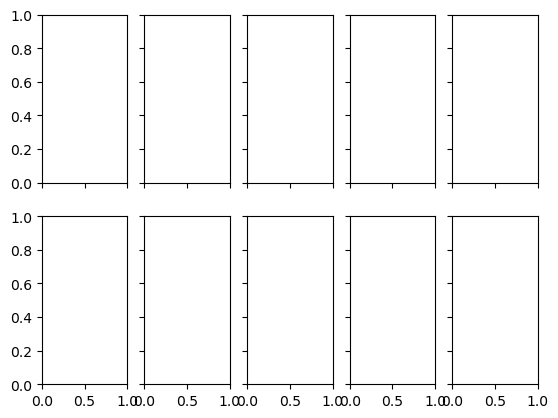

In [ ]:
# visualizziamo le prime cifre delle 10 classi 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

NameError: name 'X_train' is not defined

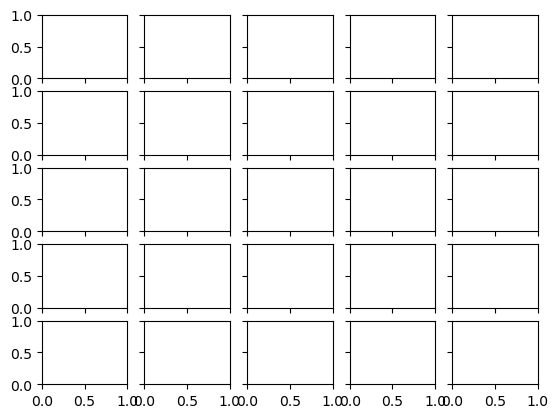

In [ ]:
# visualizziamo le prime 25 varianti della cifra '7'
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_7.png', dpi=300)
plt.show()